In [2]:
pip install vaderSentiment

     |████████████████████████████████| 133kB 1.1MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [8]:
dataset = pd.read_csv("/Users/anishajauhari/Downloads/FIFA.csv")
analyzer = SentimentIntensityAnalyzer()
dataset["sentiment_compound_score"] = dataset["Tweet"].apply(lambda x : analyzer.polarity_scores(str(x)))
dataset["sentiment_compound_score"]

0         {'neg': 0.297, 'neu': 0.549, 'pos': 0.154, 'co...
1         {'neg': 0.155, 'neu': 0.67, 'pos': 0.175, 'com...
2         {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
3         {'neg': 0.0, 'neu': 0.822, 'pos': 0.178, 'comp...
4         {'neg': 0.297, 'neu': 0.549, 'pos': 0.154, 'co...
                                ...                        
529995    {'neg': 0.0, 'neu': 0.619, 'pos': 0.381, 'comp...
529996    {'neg': 0.0, 'neu': 0.545, 'pos': 0.455, 'comp...
529997    {'neg': 0.1, 'neu': 0.597, 'pos': 0.303, 'comp...
529998    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
529999    {'neg': 0.221, 'neu': 0.427, 'pos': 0.352, 'co...
Name: sentiment_compound_score, Length: 530000, dtype: object

In [9]:
df = pd.json_normalize(dataset['sentiment_compound_score'])


In [13]:
dataset_updated = pd.merge(dataset, df, how="inner", right_index = True, left_index= True)

In [18]:
dataset_updated

,ID,lang,Date,Source,len,Orig_Tweet,Tweet,Likes,RTs,Hashtags,...,UserMentionID,Name,Place,Followers,Friends,sentiment_compound_score,neg,neu,pos,compound
0,1013597060640145408,en,2018-07-02 01:35:45,Twitter for Android,140,RT @Squawka: Only two goalkeepers have saved t...,Only two goalkeepers have saved three penaltie...,0,477,"WorldCup,POR,ENG",...,Squawka,Cayleb,Accra,861,828,"{'neg': 0.297, 'neu': 0.549, 'pos': 0.154, 'co...",0.297,0.549,0.154,-0.3818
1,1013597056219295744,en,2018-07-02 01:35:44,Twitter for Android,139,RT @FCBarcelona: ?? @ivanrakitic scores the wi...,scores the winning penalty to send into the qu...,0,1031,WorldCup,...,"FCBarcelona,ivanrakitic,HNS_CFF",Febri Aditya,Bogor,667,686,"{'neg': 0.155, 'neu': 0.67, 'pos': 0.175, 'com...",0.155,0.670,0.175,0.1027
2,1013597047482544130,en,2018-07-02 01:35:42,Twitter for Android,107,RT @javierfernandez: Tonight we have big game....,Tonight we have big game,0,488,worldcup,...,"javierfernandez,EvgeniPlushenko",??,NaN,65,67,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000
3,1013597044198391808,en,2018-07-02 01:35:41,Twitter Web Client,142,We get stronger\r\nTurn the music up now\r\nWe...,We get stronger Turn the music up now We got t...,0,0,"PowerByEXO,WorldCup,FIFAStadiumDJ,XiuminLeague",...,"weareoneEXO,FIFAWorldCup",Frida Carrillo,"Zapopan, Jalisco",17,89,"{'neg': 0.0, 'neu': 0.822, 'pos': 0.178, 'comp...",0.000,0.822,0.178,0.3818
4,1013597039999926272,en,2018-07-02 01:35:40,Twitter for Android,140,RT @Squawka: Only two goalkeepers have saved t...,Only two goalkeepers have saved three penaltie...,0,477,"WorldCup,POR,ENG",...,Squawka,tar,NaN,137,216,"{'neg': 0.297, 'neu': 0.549, 'pos': 0.154, 'co...",0.297,0.549,0.154,-0.3818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529995,1018628575782580224,en,2018-07-15 22:49:12,Twitter for Android,131,RT @FIFAWorldCup: ????\r\n#FRA\r\n\r\nFrance h...,France have won the FIFA in Moscow,0,63163,"FRA,WorldCup,FRACRO,WorldCupFinal",...,FIFAWorldCup,Nik Nur Amira,"Selangor, Malaysia",434,519,"{'neg': 0.0, 'neu': 0.619, 'pos': 0.381, 'comp...",0.000,0.619,0.381,0.5719
529996,1018628575531061249,en,2018-07-15 22:49:12,Twitter for iPhone,144,RT @BeyLegion: Beyoncé &amp; JAY-Z performed i...,Beyonc JAY performed in blue jersey to celebra...,0,687,"WorldCup,OTRII,Paris,Round2",...,BeyLegion,Staceface,HOUSTON.TX.BABYY.,972,215,"{'neg': 0.0, 'neu': 0.545, 'pos': 0.455, 'comp...",0.000,0.545,0.455,0.8176
529997,1018628575023521793,en,2018-07-15 22:49:12,Twitter Web Client,140,RT @KhaledBeydoun: They don’t say “immigrants ...,They don say immigrants are ruining France whe...,0,119,WorldCup,...,KhaledBeydoun,x,NaN,1059,4168,"{'neg': 0.1, 'neu': 0.597, 'pos': 0.303, 'comp...",0.100,0.597,0.303,0.6249
529998,1018628574729949184,en,2018-07-15 22:49:12,Twitter for Android,93,RT @ManUtd: .@PaulPogba starts for #FRA in tod...,starts for in todays final,0,1013,"FRA,WorldCup",...,"ManUtd,paulpogba",YourVillagePeople?,"Abuja, Accra",3719,2735,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000


In [19]:
dataset_updated["sentiment"] = dataset_updated["compound"].apply(lambda x : "Positive" if (x > 0.05) else ("Neutral" if (x > -0.05 and x < 0.05) else "Negative"))

In [22]:
dataset_updated

,ID,lang,Date,Source,len,Orig_Tweet,Tweet,Likes,RTs,Hashtags,...,Name,Place,Followers,Friends,sentiment_compound_score,neg,neu,pos,compound,sentiment
0,1013597060640145408,en,2018-07-02 01:35:45,Twitter for Android,140,RT @Squawka: Only two goalkeepers have saved t...,Only two goalkeepers have saved three penaltie...,0,477,"WorldCup,POR,ENG",...,Cayleb,Accra,861,828,"{'neg': 0.297, 'neu': 0.549, 'pos': 0.154, 'co...",0.297,0.549,0.154,-0.3818,Negative
1,1013597056219295744,en,2018-07-02 01:35:44,Twitter for Android,139,RT @FCBarcelona: ?? @ivanrakitic scores the wi...,scores the winning penalty to send into the qu...,0,1031,WorldCup,...,Febri Aditya,Bogor,667,686,"{'neg': 0.155, 'neu': 0.67, 'pos': 0.175, 'com...",0.155,0.670,0.175,0.1027,Positive
2,1013597047482544130,en,2018-07-02 01:35:42,Twitter for Android,107,RT @javierfernandez: Tonight we have big game....,Tonight we have big game,0,488,worldcup,...,??,NaN,65,67,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,Neutral
3,1013597044198391808,en,2018-07-02 01:35:41,Twitter Web Client,142,We get stronger\r\nTurn the music up now\r\nWe...,We get stronger Turn the music up now We got t...,0,0,"PowerByEXO,WorldCup,FIFAStadiumDJ,XiuminLeague",...,Frida Carrillo,"Zapopan, Jalisco",17,89,"{'neg': 0.0, 'neu': 0.822, 'pos': 0.178, 'comp...",0.000,0.822,0.178,0.3818,Positive
4,1013597039999926272,en,2018-07-02 01:35:40,Twitter for Android,140,RT @Squawka: Only two goalkeepers have saved t...,Only two goalkeepers have saved three penaltie...,0,477,"WorldCup,POR,ENG",...,tar,NaN,137,216,"{'neg': 0.297, 'neu': 0.549, 'pos': 0.154, 'co...",0.297,0.549,0.154,-0.3818,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529995,1018628575782580224,en,2018-07-15 22:49:12,Twitter for Android,131,RT @FIFAWorldCup: ????\r\n#FRA\r\n\r\nFrance h...,France have won the FIFA in Moscow,0,63163,"FRA,WorldCup,FRACRO,WorldCupFinal",...,Nik Nur Amira,"Selangor, Malaysia",434,519,"{'neg': 0.0, 'neu': 0.619, 'pos': 0.381, 'comp...",0.000,0.619,0.381,0.5719,Positive
529996,1018628575531061249,en,2018-07-15 22:49:12,Twitter for iPhone,144,RT @BeyLegion: Beyoncé &amp; JAY-Z performed i...,Beyonc JAY performed in blue jersey to celebra...,0,687,"WorldCup,OTRII,Paris,Round2",...,Staceface,HOUSTON.TX.BABYY.,972,215,"{'neg': 0.0, 'neu': 0.545, 'pos': 0.455, 'comp...",0.000,0.545,0.455,0.8176,Positive
529997,1018628575023521793,en,2018-07-15 22:49:12,Twitter Web Client,140,RT @KhaledBeydoun: They don’t say “immigrants ...,They don say immigrants are ruining France whe...,0,119,WorldCup,...,x,NaN,1059,4168,"{'neg': 0.1, 'neu': 0.597, 'pos': 0.303, 'comp...",0.100,0.597,0.303,0.6249,Positive
529998,1018628574729949184,en,2018-07-15 22:49:12,Twitter for Android,93,RT @ManUtd: .@PaulPogba starts for #FRA in tod...,starts for in todays final,0,1013,"FRA,WorldCup",...,YourVillagePeople?,"Abuja, Accra",3719,2735,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,Neutral


<AxesSubplot:>

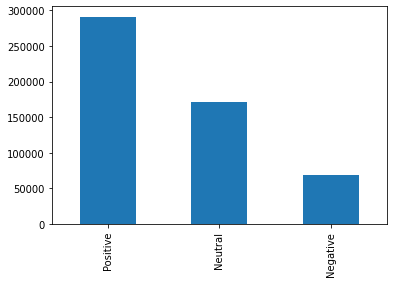

In [26]:
dataset_updated["sentiment"].value_counts().plot(kind="bar")